In [3]:
import pandas as pd

df = pd.read_csv("silver_data.csv")
df['context'] = df['contex']
df = df[(df['section']!= 'References') & (df['section']!= 'Appendix') & (df['section']!='Disclaimer')]
df.head(1)

,section,title,file_name,document_type,subject,page,pg_word_ct,total_pages,contex,page_whole,question,answer,context
9,Discussion,The Virtual Human Reliability Analyst,The Virtual Human Reliability Analyst.pdf,academic paper,"science, chemistry, materials science",9,519,13,['tic element but the clinical data is replace...,tic element but the clinical data is replaced...,What is the significance of the VHRAM's poten...,The text argues that the VHRAM could have a b...,['tic element but the clinical data is replace...


In [4]:
df['contex'].iloc[1]

"['tic element but the clinical data is replaced by empirical or simulated plant and oper a tor performance data and treatment procedures are replaced by operating procedures. We also want to include a decision making algorithm much like the ones developed for the clinical AI applications . The primary differ ence between the clinical AI and the work here is that the VHRAM model will include the simulation of human er ror as one of the key aspects. The inspiration for the human error element stems from other fields that develop ed intelligent agents with inherent limitations as to how well they can perform. For entertainment purposes , an intelligent agent opponent in a game has to provide the player with a challenge, without performing so well that the player is without a chance to win . A chess match between a hum an and the chess computer s of today would not be entertain ing, nor would neither a soccer game where every shot made by the opponent is a goal, nor a shooting game where 

In [20]:
# !pip install fuzzywuzzy
# !pip install scikit-learn
# !/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 36.1 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.4 MB/s eta 0:00:00


In [13]:
from fuzzywuzzy import fuzz

def calculate_fuzzy_similarity(response, context):
    return fuzz.ratio(response, context)  # Or use other fuzzywuzzy functions

user_input = df['question'].iloc[0]
response = df['answer'].iloc[0]
retrieved_context = df['context'].iloc[0]

similarity_score = calculate_fuzzy_similarity(response, retrieved_context)
print(f"Fuzzy Similarity Score: {similarity_score}")

Fuzzy Similarity Score: 4


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def calculate_tfidf_cosine_similarity(response, context):
    """Calculates TF-IDF cosine similarity between response and context."""

    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([response, context])  # Fit and transform both strings

    similarity = cosine_similarity(vectors[0], vectors[1])[0][0] # cosine_similarity returns a 2d array
    return similarity

tfidf_similarity = calculate_tfidf_cosine_similarity(response, retrieved_context)

print(f"TF-IDF Cosine Similarity: {tfidf_similarity:.2f}")

TF-IDF Cosine Similarity: 0.57


In [15]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import nltk  # Make sure you have NLTK installed
nltk.download('punkt', quiet=True) # Download punkt tokenizer if you haven't already

def calculate_bleu_score(response, context):
    """Calculates BLEU score between response and context."""

    reference = context.split()  # Split the context into words
    candidate = response.split()  # Split the response into words

    # Use a smoothing function to handle cases where n-grams are not present
    smoothing = SmoothingFunction().method4  # Or another smoothing method

    bleu = sentence_bleu([reference], candidate, smoothing_function=smoothing)
    return bleu

bleu_score = calculate_bleu_score(response, retrieved_context)

print(f"BLEU Score: {bleu_score:.2f}")

BLEU Score: 0.00


In [18]:
df = pd.read_csv("silver_data_graded.csv")
df = df[(df['similarity_score'] > 30) & (df['BLEU'] > 0.005) & (df['Cosine'] > 0.46)]
df.head(), df.shape

(     section                                              title  \
 36   Results  Text-Mining-for-Procedure-Level-Primitives-in-...   
 38   Results  Text-Mining-for-Procedure-Level-Primitives-in-...   
 41   Results  Text-Mining-for-Procedure-Level-Primitives-in-...   
 43   Results  Text-Mining-for-Procedure-Level-Primitives-in-...   
 57  Abstract  Text-Mining-for-Procedure-Level-Primitives-in-...   
 
                                             file_name   document_type  page  \
 36  Text-Mining-for-Procedure-Level-Primitives-in-...  academic paper     8   
 38  Text-Mining-for-Procedure-Level-Primitives-in-...  academic paper     8   
 41  Text-Mining-for-Procedure-Level-Primitives-in-...  academic paper     7   
 43  Text-Mining-for-Procedure-Level-Primitives-in-...  academic paper     6   
 57  Text-Mining-for-Procedure-Level-Primitives-in-...  academic paper     1   
 
     total_pages                                            context  \
 36           12  ['Fig. 4. A Euclidi

In [19]:
df['similarity_score'].hist()

ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

<Axes: >

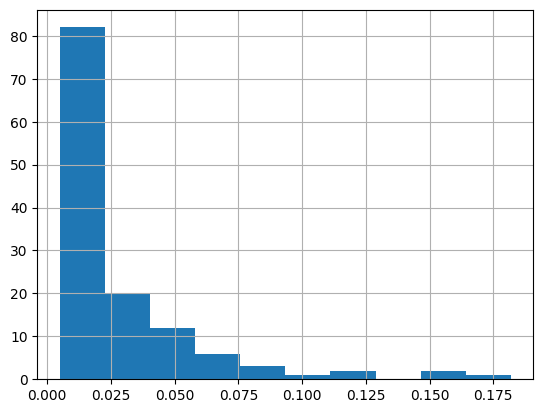

In [37]:
df['BLEU'].hist()

<Axes: >

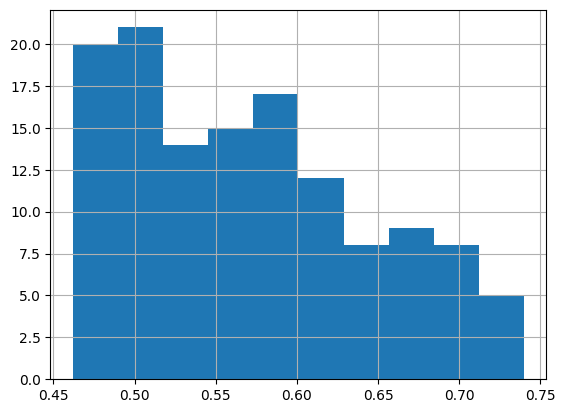

In [38]:
df['Cosine'].hist()

In [39]:
pd.options.display.max_colwidth = None
df = df.reset_index(drop=True)

df[['question', 'answer']].head()
df.to_csv('half_golden.csv', index=False)

PermissionError: [Errno 13] Permission denied: 'half_golden.csv'

In [ ]:
df.columns

Index(['section', 'title', 'file_name', 'document_type', 'subject', 'page',
       'total_pages', 'context', 'question', 'answer', 'similarity_score',
       'BLEU', 'Cosine'],
      dtype='object')